# Forces in stack of axis (beam)

This notebook goes together with Basics : Forces

In [1]:
from DAVE import *
from DAVE.jupyter import *

DAVEcore version = 2.0 from c:\python\miniconda3\envs\book\Lib\site-packages\DAVEcore.cp311-win_amd64.pyd
Blender found at: C:\Users\beneden\AppData\Local\Microsoft\WindowsApps\\blender-launcher.exe


In [2]:
s = Scene()

In [3]:
a = s.new_frame('axis_0')

In [4]:
for i in range(10):
    a = s.new_frame(f'axis_{i+1}', parent = a, position = (1,0,0))

In [5]:
p = s.new_point('point',parent=a)

In [6]:
f = s.new_force('force', parent = p)

In [7]:
f.force = (0,0,-5)

c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\visual_helpers\vtkHelpers.py:604: RuntimeWarning: invalid value encountered in divide
  axis = axis / length
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\visual_helpers\vtkHelpers.py:665: RuntimeWarning: invalid value encountered in divide
  axis = axis / length


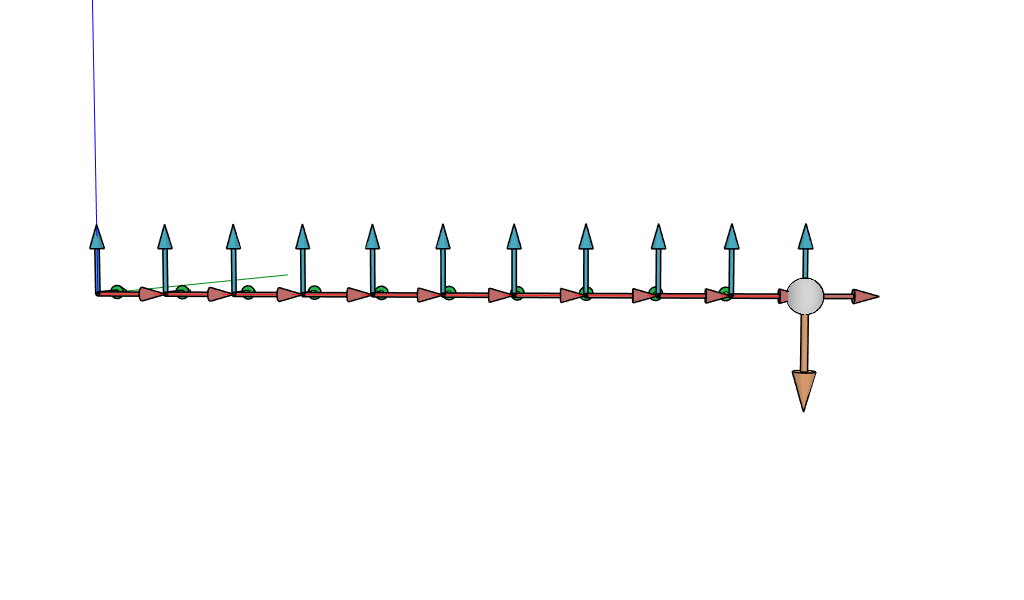

In [8]:
show(s, camera_pos = (7.120972238813686, -15.59726683922203, 0.7170462426406728), lookat = (5.597812229842809, 5.030382818599853, -0.31770605518614115))

In [9]:
s.print_node_tree()

axis_0 [Frame]
 |-> axis_1 [Frame]
 |    |-> axis_2 [Frame]
 |    |    |-> axis_3 [Frame]
 |    |    |    |-> axis_4 [Frame]
 |    |    |    |    |-> axis_5 [Frame]
 |    |    |    |    |    |-> axis_6 [Frame]
 |    |    |    |    |    |    |-> axis_7 [Frame]
 |    |    |    |    |    |    |    |-> axis_8 [Frame]
 |    |    |    |    |    |    |    |    |-> axis_9 [Frame]
 |    |    |    |    |    |    |    |    |    |-> axis_10 [Frame]
 |    |    |    |    |    |    |    |    |    |    |-> point [Point]
 |    |    |    |    |    |    |    |    |    |    |    |-> force [Force]


Update() calculates the forces in the model

In [10]:
s.update()

Get all the axis-type nodes from the scene.

For each of them, obtain the global positon, shear and the moment about the y-axis.

From this we can plot the moment and shear lines of the beam.

In [11]:
x = []
my = []
fz = []

for a in s.nodes_of_type(Frame):
    x.append(a.global_position[0])
    fz.append(a.applied_force[2])# python is zero based, so 0=fx, 1=fy, 2=fz, 3=mx, 4=my
    my.append(a.applied_force[4])  

And now plot them

In [12]:
import matplotlib.pyplot as plt

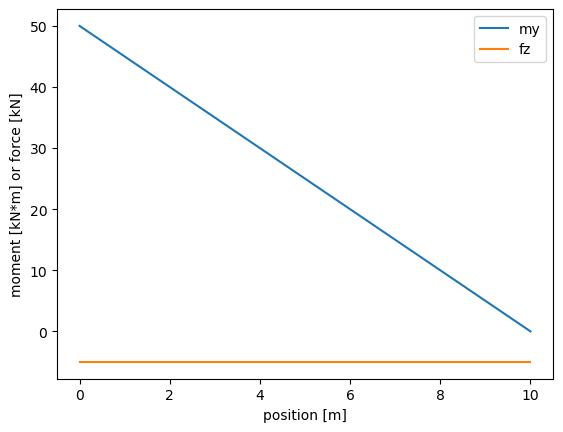

In [13]:
plt.plot(x,my, label = 'my')
plt.plot(x,fz, label = 'fz')
plt.legend()
plt.xlabel('position [m]')
plt.ylabel('moment [kN*m] or force [kN]');

---

## The equilibrium error

Release the connection of axis_6 about the Y-axis

In [14]:
s['axis_6'].fixed = (True,True,True,True,   False,   True)

Updating the model will calculate the forces the for current positions and rotations but will *not* solve statics. So an equilibrium error will be present about the released dof of axis_6

In [15]:
s.update()

In [16]:
s['axis_6'].equilibrium_error

(0.0, 0.0, 0.0, 0.0, 20.0, 0.0)

If we solve the model then the geometry will be updated such that the equilibrium errors are all zero.

In [17]:
s.solve_statics()

True

In [18]:
s['axis_6'].equilibrium_error

(0.0, 0.0, 0.0, 0.0, 3.09698442602091e-05, 0.0)

c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\visual_helpers\vtkHelpers.py:604: RuntimeWarning: invalid value encountered in divide
  axis = axis / length
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\visual_helpers\vtkHelpers.py:665: RuntimeWarning: invalid value encountered in divide
  axis = axis / length


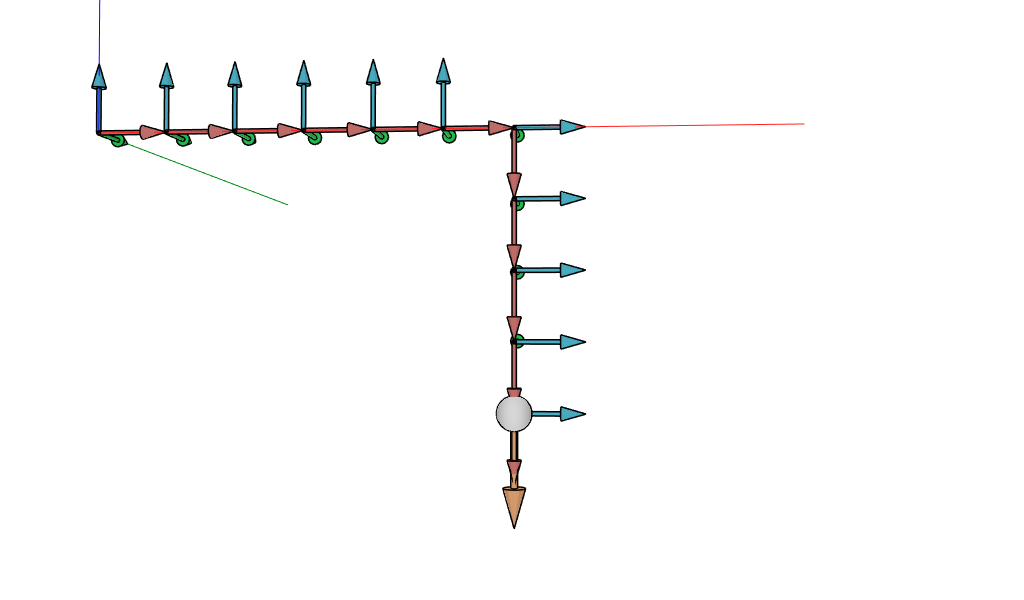

In [19]:
show(s, camera_pos = (7.120972238813686, -15.59726683922203, -2.7170462426406728), lookat = (5.597812229842809, 5.030382818599853, -2.31770605518614115), force_do_normalize = True, force_scale = 1.6, cog_scale = 0.25)